In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units

ds=xr.open_dataset('cm1_original/cm1out_20000101.000004.nc')

num_x = ds.ni
num_y = ds.nj
num_z = ds.nk

dx = ds['xh']*units('m')
dy = ds['yh']*units('m')
dz = ds['zh']*units('m')

u = ds['u']
v = ds['v']
w = ds['w']

x_space = 31.25*units('m')
y_space = 31.25*units('m')
z_space = 15.625*units('m')

lev = 0
u = u.isel(nk=lev,time=0)
v = v.isel(nk=lev,time=0)
w = w.isel(nk=lev,time=0)

# z_vort tilting term
dudz = mpcalc.first_derivative(u, delta=dz[1]-dz[0])
dvdz = mpcalc.first_derivative(v, delta=dz[1]-dz[0])
dwdy = mpcalc.first_derivative(w, delta=dy[1]-dy[0])
dwdx = mpcalc.first_derivative(w, delta=dx[1]-dx[0])

# z vort stretching term
dudx = mpcalc.first_derivative(u, delta=dx[1]-dx[0])
dvdy = mpcalc.first_derivative(v, delta=dy[1]-dy[0])
dwdz = mpcalc.first_derivative(w, delta=dz[1]-dz[0])

# z vort
dvdx = mpcalc.first_derivative(v, delta=dx[1]-dx[0])
dudy = mpcalc.first_derivative(u, delta=dy[1]-dy[0])

div = dudx + dvdy
z_vort = dvdx - dudy

In [3]:
vort_budget = (-z_vort*div) - (dwdx*dvdz - dwdy*dudz)

In [6]:
vort_budget.min(), vort_budget.max()

(-0.79621017 <Unit('1 / second ** 2')>, 0.97346836 <Unit('1 / second ** 2')>)

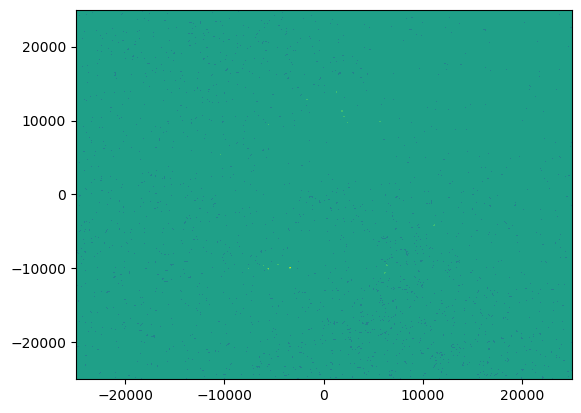

In [10]:
plt.contourf(dx, dy, vort_budget)